# CAPM

In [6]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices

In [8]:
path = '../data/capm.csv'
df = pd.read_csv(path)
df['topix_return'] = np.log(df['topix']).diff()
df['toyota_return'] = np.log(df['toyota']).diff()
df['fast_retailing_return'] = np.log(df['fast_retailing']).diff()
df['hitachi_return'] = np.log(df['hitachi']).diff()
df['kddi_return'] = np.log(df['kddi']).diff()
df.head()

,date,topix,toyota,fast_retailing,hitachi,kddi,topix_return,toyota_return,fast_retailing_return,hitachi_return,kddi_return
0,2014/03,1202.89,20088033388392,3970867312360,3683099100894,5360254473600,NaN,NaN,NaN,NaN,NaN
1,2014/04,1162.44,19019154165872,3369960051120,3513927882349,4881275911200,-0.034206,-0.054678,-0.164084,-0.047020,-0.093605
2,2014/05,1201.41,19863913551412,3563014105040,3306088956708,5429320670800,0.032975,0.043458,0.055706,-0.060969,0.106407
3,2014/06,1262.56,20795096741328,3535434954480,3586429833154,5542338084400,0.049646,0.045813,-0.007771,0.081391,0.020602
4,2014/07,1289.42,20976250608404,3649464134680,3908821841067,5379090709200,0.021051,0.008674,0.031744,0.086079,-0.029897


## 散布図

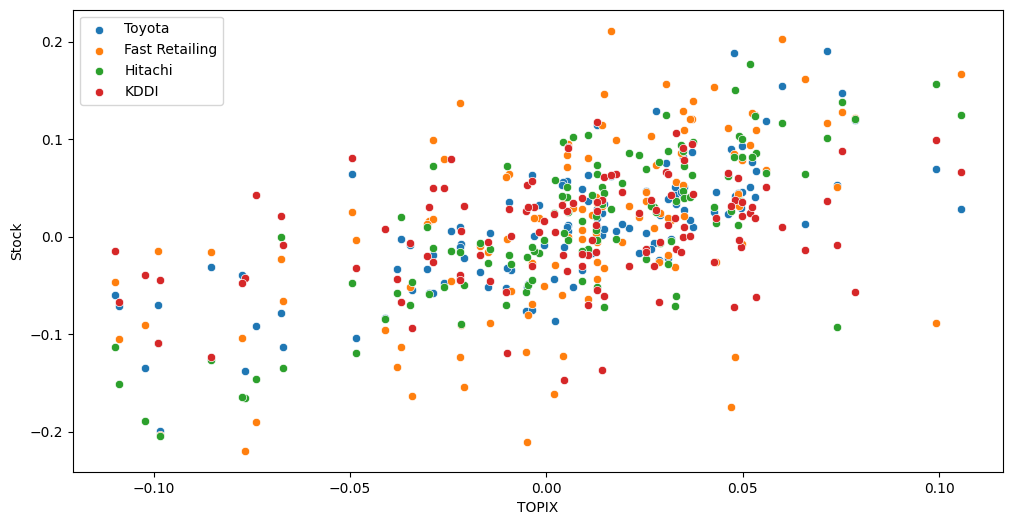

In [28]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='topix_return', y='toyota_return', data=df, label='Toyota')
sns.scatterplot(x='topix_return', y='fast_retailing_return', data=df, label='Fast Retailing')
sns.scatterplot(x='topix_return', y='hitachi_return', data=df, label='Hitachi')
sns.scatterplot(x='topix_return', y='kddi_return', data=df, label='KDDI')

plt.xlabel('TOPIX')
plt.ylabel('Stock')
plt.show()


## CAPM

- $R_t$: 株価収益率．
- $R_{Mt}$: 市場収益率．
- $R_{ft}$: 安全利子率

CAPMは以下の式で表される．

- Sharpe-Linter型CAPM

$$
\underbrace{R_t - R_{ft}}_{個別銘柄の超過収益率} = \alpha + \beta \underbrace{(R_{Mt} - R_f)}_{市場ポートフォリオの超過収益率} + \epsilon_t
$$

- Black型CAPM

ブラック・ショールズが導いた，安全資産がない資産の式．
$$
R_t = \alpha + \beta R_{Mt} + \epsilon_t
$$

Prob(JP)は正規性の仮定を検定している．0.05より小さいので，正規分布ではない．
株価収益率は正規分布に従わない．

理論式としては $\alpha$ はいらない．なぜなら0になるから．

### トヨタ

In [30]:
formula = 'toyota_return ~ topix_return'
y, x = dmatrices(formula, data=df, return_type='dataframe')
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          toyota_return   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           7.67e-22
Time:                        00:06:48   Log-Likelihood:                 207.62
No. Observations:                 120   AIC:                            -411.2
Df Residuals:                     118   BIC:                            -405.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0017      0.004      0.437   

### ファーストリテイリング

In [31]:
formula = 'fast_retailing_return ~ topix_return'
y, x = dmatrices(formula, data=df, return_type='dataframe')
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     fast_retailing_return   R-squared:                       0.308
Model:                               OLS   Adj. R-squared:                  0.302
Method:                    Least Squares   F-statistic:                     52.55
Date:                   Wed, 18 Dec 2024   Prob (F-statistic):           4.73e-11
Time:                           00:07:14   Log-Likelihood:                 137.35
No. Observations:                    120   AIC:                            -270.7
Df Residuals:                        118   BIC:                            -265.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0

### 日立製作所

In [32]:
formula = 'hitachi_return ~ topix_return'
y, x = dmatrices(formula, data=df, return_type='dataframe')
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         hitachi_return   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     190.4
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           2.25e-26
Time:                        00:07:30   Log-Likelihood:                 194.65
No. Observations:                 120   AIC:                            -385.3
Df Residuals:                     118   BIC:                            -379.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0006      0.004      0.125   

### KDDI

In [34]:
formula = 'kddi_return ~ topix_return'
y, x = dmatrices(formula, data=df, return_type='dataframe')
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            kddi_return   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     16.25
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           9.87e-05
Time:                        00:07:46   Log-Likelihood:                 191.50
No. Observations:                 120   AIC:                            -379.0
Df Residuals:                     118   BIC:                            -373.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0025      0.005      0.545   